# 1. 大量のファイル処理を指示されました😢編

    ・大量のファイルのファイル名変更
    ・大量のファイルの中身の確認
    ・大量のデータファイルの作図、報告書への掲載…

手作業でやっていると「こんな単純作業ばかりをやるために会社にはいったんじゃない😢」と感じることは、今まで1回くらいはあったんじゃないでしょうか。

ここでは、以下の図のようなCSV（カンマ区切りのテキストファイル）が大量（※デモなのでそれほど多くないです）にある場合を想定して、手作業を回避する体験をしながら、Pythonの大事な文法を解説していきます。  
このノートブックでは、データの取得日別のフォルダがあって、日別のCSVファイルが置いてあるような状況です。  
ファイルの中身はヘッダ情報として日付、あとは1時間ごとに3種類の数値が入っています。  

たとえばこういったファイルを10年分統合するとなると腱鞘炎になってしまいますよね。ここではまずこういったデータを一つにまとめる作業を行います。次のノートブックでは、図化することを行っていきます。  
皆さんの身近な作業にイメージがわきやすいといいなぁ。。。

![alt text](_img/1.0_files.png "ファイル構成")

## 1-1. どこにどれくらいのファイルがあるか把握しよう！👀　～glob～

今回はフォルダの数は二つだけですが、これがとてもたくさんある場合には作業量自体の全容の把握も困難です。  
今回の場合は、フォルダのしたにCSVファイルがあることはわかっているので、それを基にどこに何個のファイルがあるかを確認してみましょう。  
それを実施するのに、とても都合がよいライブラリ「**glob**」があるので、それを使ってみましょう。

作業を始める前に、プログラムが実行されている場所を確認しますね。  
以下のように実行してみてもらっていいですか？

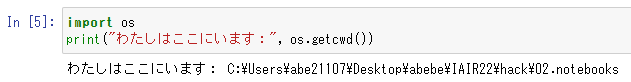

CSVファイルがあるのは、今の場所からみて「*_data/01_01_inputs*」の下に「？？送付」というフォルダがあって、CSVファイルはその下にあります。  
**glob**は、住所を指定して、それに合致するフォルダやファイルを返してくれるライブラリです。  
以下のように使います。実行してみてください。

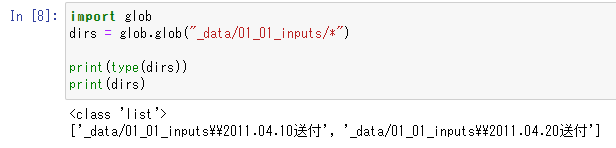

アスタリスクは「**どんなものにも当てはまる**」という意味の記号です。  
なので、2行目は「01_01_inputs」の下の全てを検索して教えてね！というお願いになります。

**glob**が返してくれた「dirs（←名前はすきにつけてよい）」は「**リスト**」が返ってきており、確かに「01_01_inputs」の直下にある二つのフォルダの場所が返ってきていることがわかります。

ちなみに、以下のような方法でも同じように使えます。

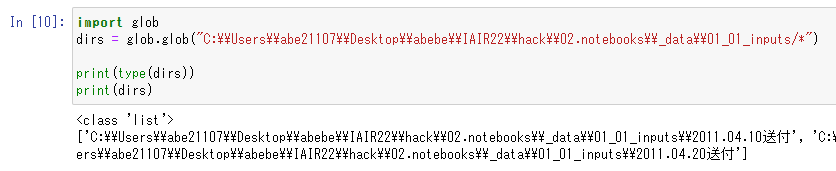

前者が相対的な住所（相対パス）を指定する方法でプログラムを実行する場所が変わるとこの住所も変わります。一方で、後者はプログラムをどこで実行しても変化しない絶対的な住所（絶対パス）を指定する方法となります。  
「**相対パス**」「**絶対パス**」は、たまに出てくるキーワードなので、覚えておくとよいかも。


全てのCSVファイルのパスを探すには以下のような方法で記述できます。  
実際に実行してみましょう！リストが返ってくることはわかってますので、「**len()**」でファイル数も調べてみましょう。

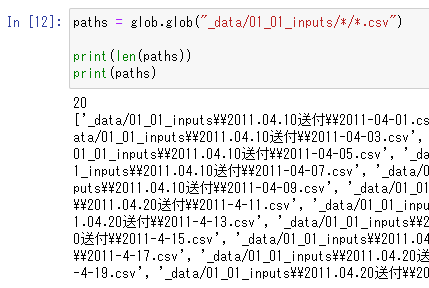

アスタリスクの使い方が少しだけおしゃれな感じになっているかと思います。  
「01_01_inputs」の下にあるあらゆるフォルダの下にある「？？？.csv」に当てはまる全てのファイルを探してね！ということです。  
ファイルは20ファイルあることがわかりましたね。これでフォルダが何千何万あろうと、ファイル数が簡単に把握できます。

## 1-2. 大量のファイルの中身を確認してみよう！🔎　～テキストI/O・関数～

全てのファイルの住所が手元にそろいました。ここでは1つ目のファイルの中身を読み込んでみようと思います。  
「**pandas**」といったおしゃれなライブラリでさくっと読み込むこともできますが、ここでは最も原始的な方法でファイルの読み込みを行ってみようと思います（基本がわかったうえで便利機能を使うのは容易ですが、その逆は難しい）。  
以下の一連のスクリプトを記述してみてください。

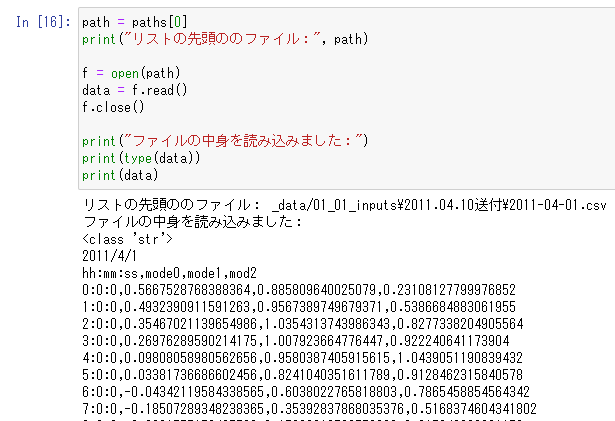

ファイルの中身を表示することができました。

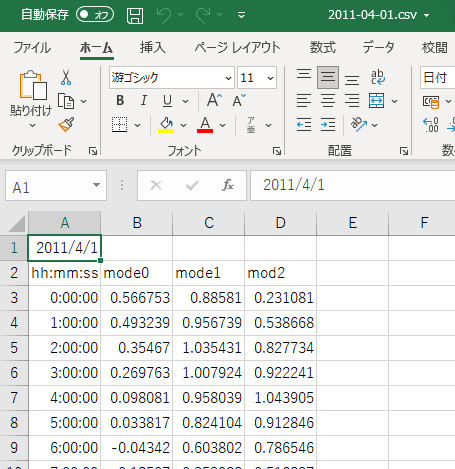

確かに内容は同じであることが確認できます。  

この操作と同じことを全てのファイルに対して行っていけば、全てをグラフ化したり、全データを合体させたりといろんなことができるようになるのですが、ちょっとずつコードを書く行が増えてきています。  
全てのファイルに対して読み込みを行う前に、一連のプロセスをまとめることができる「**関数**」と呼ばれるものを紹介します。  
以下のようなコードで、あるファイルの読み込みをたった一言で実行できるようになります。

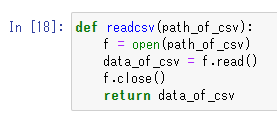

あれ、実行しても何も帰ってこないと思いますが、問題ありません。  
これは「**関数を定義**」した状況で、その関数を使ったわけではありません。  

以下のようにすると実際に実行されます。
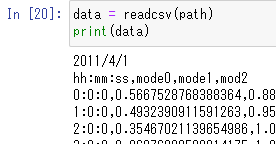

関数はこれからかなり多用する大事な機能になります。  
他にも大事な特徴があるので、いくつか解説します。  

関数の定義の仕方、使い方は以下のような形になっています。  

![alt text](_img/1.2_def.png "関数の説明")

    ・「def ???():」と定義します。
    ・この1行の「（）」の中に入れる変数を引数と呼んで、関数に入力することができます。この関数の入り口です。省略可。
    ・「de ...」以降は字下げしていますが、Pythonではこの字下げをそろえるルールです。
    ・Notebookの場合は、勝手に字下げしてくれると思います。
    ・関数が呼び出されると、字下げされた箇所（ブロックと呼ばれます）のプログラムが実行されます。
    ・最後の行は「return ???」とありますが、これは返値がある場合に返すことができます。この関数の出口です。省略可。

関数はプログラミングをやっていくうえで、処理や手続きをまとめて管理できるので、とても便利です。  
同じ処理を行いたい時などにこういった処理を関数として登録しておくと、関数名を記入するだけで、一連の処理を全てやってもらえます。  
大きなプロジェクトを安全に構築していくためには必須の機能となってきます（次回紹介するクラスも）ので、書きながら使いこなせることを目指してほしいです。


ちなみに、ここではファイルの読み込みの関数を作りましたが、書き出しの関数の場合は以下のようになります。
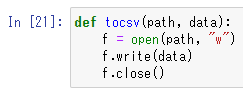

## 1-3. 全てのファイルで中身を確認しよう！🐍　～For文～

関数を準備したので、あとはそれを全てのファイルで実施するだけです。  
少なくとも全てのパス名を順番に手入力すれば、目的はたっせできなくもないですが…。

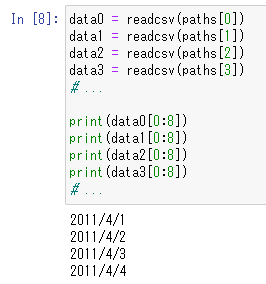

20ファイルならできなくもないですが、数万ファイルもある場合などは大変です。  
そこで、繰り返し（ループ）を行う方法を紹介します。以下のように実施してみてもらっていいですか。

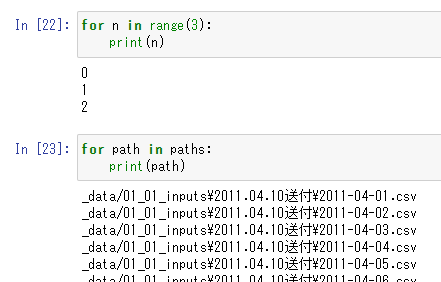

こういった繰り返しを行う構文（For文）は、いろんなプログラミング言語に出てくる主要な構文の一つです。  
For文を使えば、先ほどのファイル読み込みを20個全て関数を書く必要がなくなります。  
どんな感じで記述すればよいかイメージできますか？

例えば、こんな感じですかね。
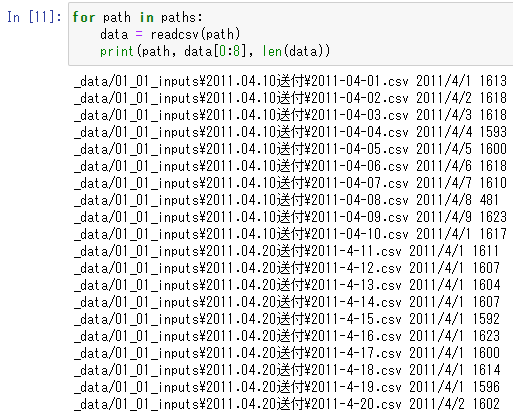

このノートブックの締めくくりとして、For文を自分で記述していく場合に便利な「**break**」の機能を紹介しておきます。

For文は問答無用で処理が自動で進んでしまうため、ファイル数が20であればすぐ終わって問題ないですが、数万のファイルで同じ処理をしようと思うと、回りきるまでにさすがに時間がかかってしまいます。  
そこで、以下のようにFor文直下のブロックの中で「**break**」と記載しておくと、これに出会った時点でFor文を停止してブロックから抜け出します。
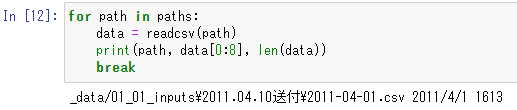

## 1-4. 大量のファイルを統合して一つのファイルにしよう！🌏（練習問題）

ここまでの要素技術を用いて、20あるCSVファイルを一つに統合してみましょう！  

    ・まずは単なるファイルの合体のみからトライしてみてください。
    ・合体させてみると、項目名のヘッダ情報は最初のみ必要で要らない気がしますよね。削除してみましょうか。
    ・ヘッダ情報のうち日付は必要になりそうです。この情報をうまく反映して結合するのはどうすればよいでしょうか。
    　解決策は一つではないと思います。実務であれば無理にPythonで対応せず、エクセルでの対応でも問題ないかと。
    　Pythonのみで完璧を目指す場合はいくつか込み入った知識が必要です。気になる方はWebをうまく活用しながらトライしてみてください。

## 1-5. ZIPファイルのまま同様の処理をしてみよう！🔓（練習問題）

CSVなどのアスキーファイルはZIPなどに圧縮して送付されることがあるし、圧縮すると容量も軽くなるので、そのままいろんな処理ができると結構助かります。  
「*ZIPをそのまま処理する*」というのは、プログラマからすると結構あるあるです。Webで検索しながら実現してみてください！  
検索のキーワードは、例えば…

> python ZIP 解凍せず 中身 読む

**Hint!**  
https://qiita.com/YM_DSKR/items/654ba5517cd2c91b28d8  
※zipfileというライブラリの他に、pandasというライブラリも使っていますが、zipfileというライブラリの利用方法を参照して処理を実施してみてください。

## 1-6. 統合した結果をエクセルに保存してみよう！📊（練習問題）

今回はCSVファイルなどのテキストデータでの保存ですが、Pythonとエクセルの連携を行ってくれるライブラリは数多くあります。  
そういった事例をWebで探してきて、エクセルに直接書き出すツールを作ってみましょう。

## 1-7. 階層構造が不明の場合にCSVをしらみつぶしに探り当てよう！🏆（練習問題）

このノートブックの最終問題です。  
ここで紹介しているプログラムは基本的にファイルの置き場所がきれいに整っています。  
一方で実務では、お客様から送られてくるファイルのフォルダ構成がフォルダ別に違っていたり、命名規則もバラバラだったりすることは日常茶飯事のはずです。  

わざとフォルダ構成を不揃いにした「01_02_inputs」を準備していますので、どんなフォルダ構成でも適宜対応できるツールを整備してみてください。